##Different types of thresholding

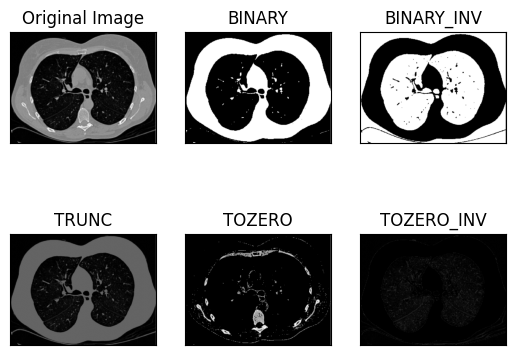

In [34]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/3-Figure3-1.png',0)
ret,thresh1 = cv.threshold(img,100,255,cv.THRESH_BINARY) ## 100> == 255
ret,thresh2 = cv.threshold(img,70,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,100,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,150,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,50,255,cv.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

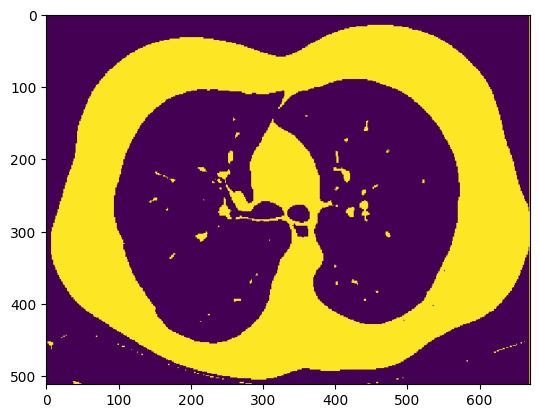

In [32]:
plt.imshow(thresh1)

##Region based Some segmentation algorithms

Watershed segmentation

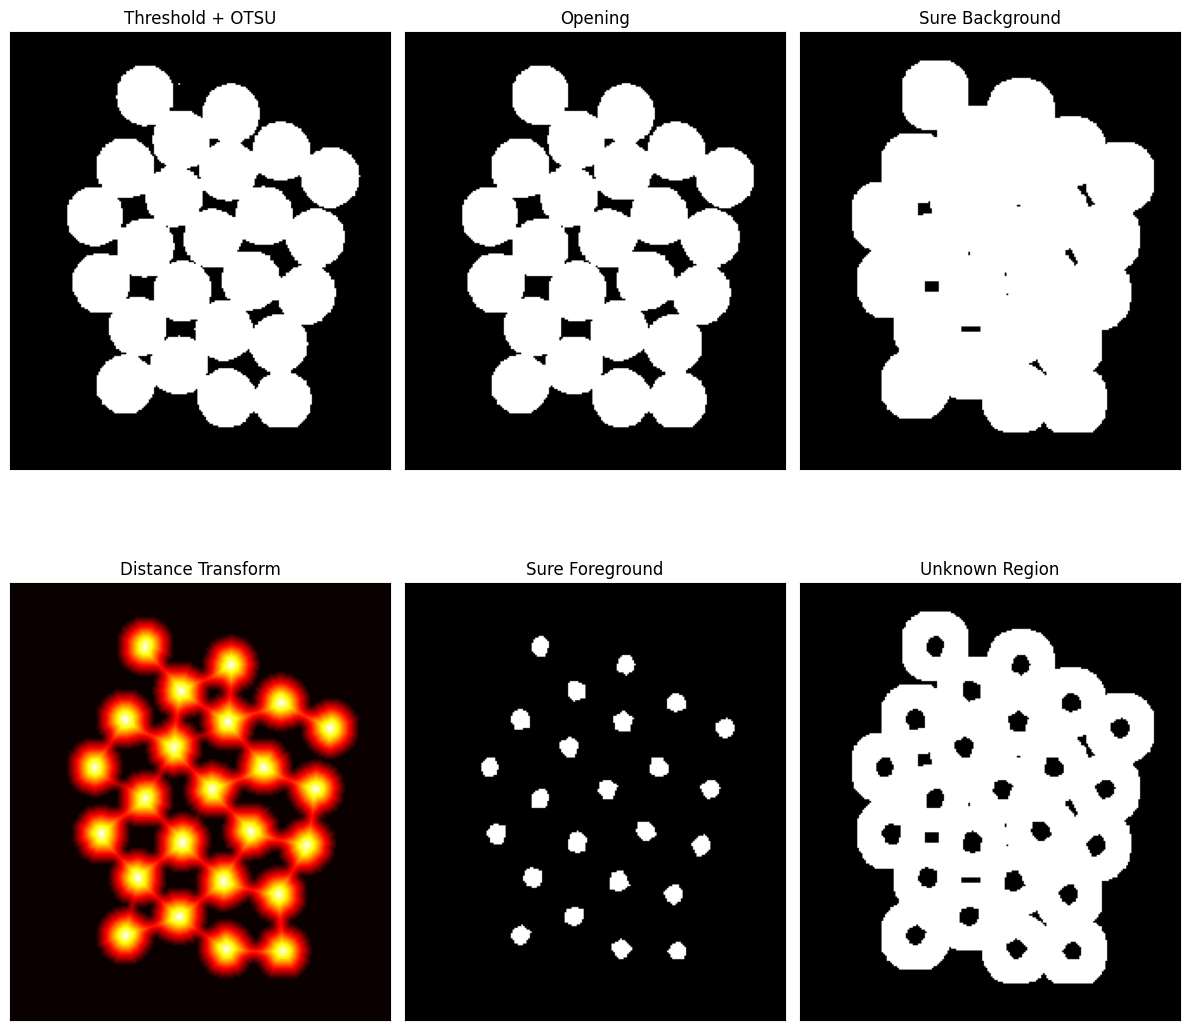

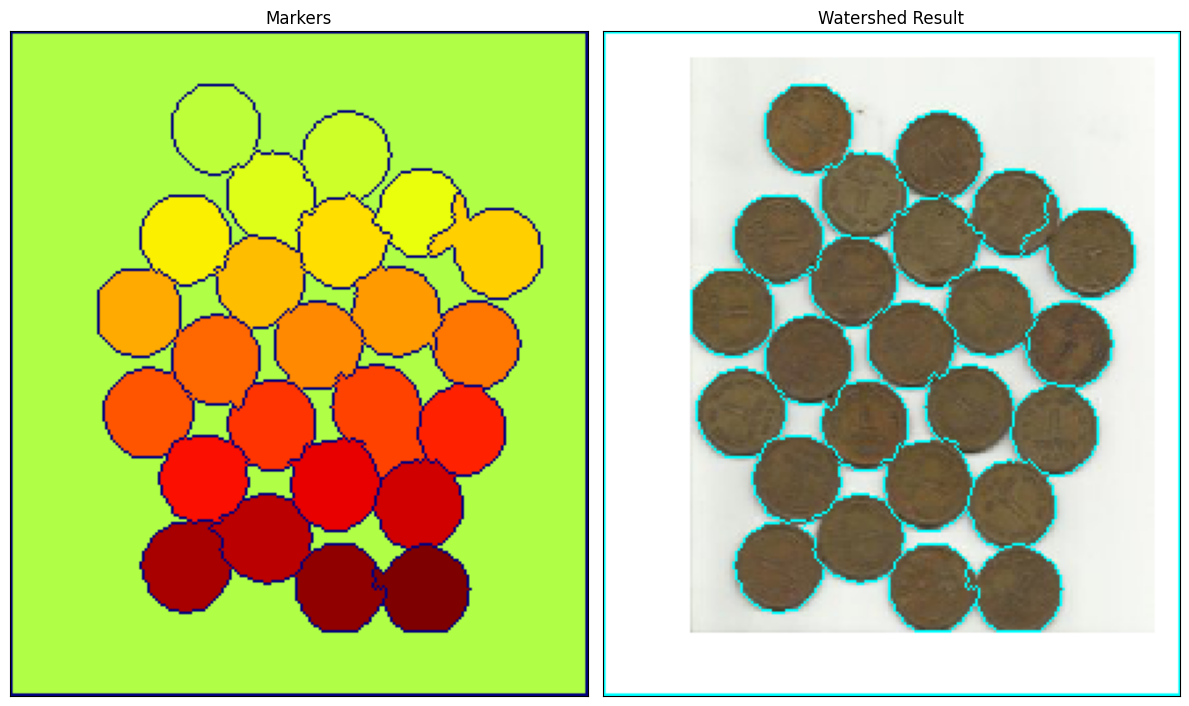

In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Read image
img = cv.imread('/content/download.png')
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Thresholding to get binary image
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = sure_bg- sure_fg

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 30

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv.watershed(img, markers)
img[markers == -1] = [255, 255, 0]

# Visualize the process step by step
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(thresh, cmap='gray')
plt.title('Threshold + OTSU'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(opening, cmap='gray')
plt.title('Opening'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(dist_transform, cmap='hot')
plt.title('Distance Transform'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(unknown, cmap='gray')
plt.title('Unknown Region'), plt.xticks([]), plt.yticks([])


plt.tight_layout()
plt.show()

# Visualize markers and final result after watershed
plt.figure(figsize=(12, 12))

plt.subplot(121), plt.imshow(markers, cmap='jet')
plt.title('Markers'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Watershed Result'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


Segmentation with KMeans clustering

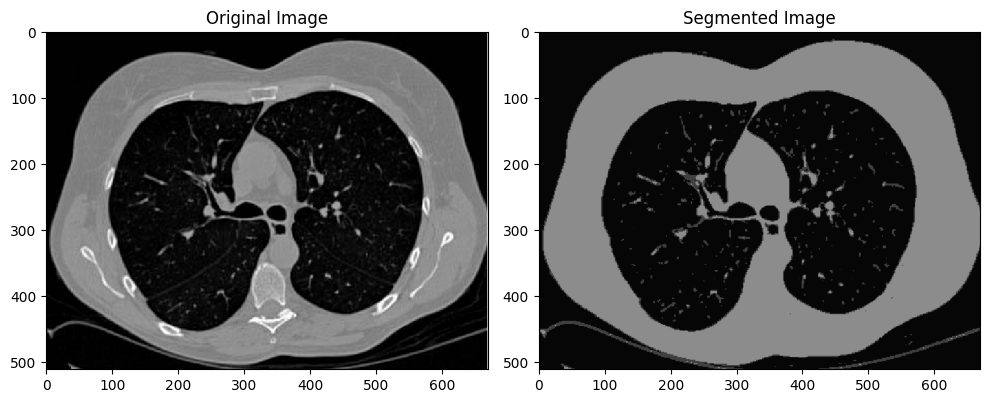

In [42]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the image
image_path = '/content/3-Figure3-1.png'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Set the number of clusters (segments)
num_clusters = 3
# num_clusters = 20

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Replace pixel values with cluster centers
segmented_pixels = centers[labels].reshape(image_rgb.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_pixels.astype(np.uint8))
plt.title('Segmented Image')

plt.tight_layout()
plt.show()

##A full segmentation process

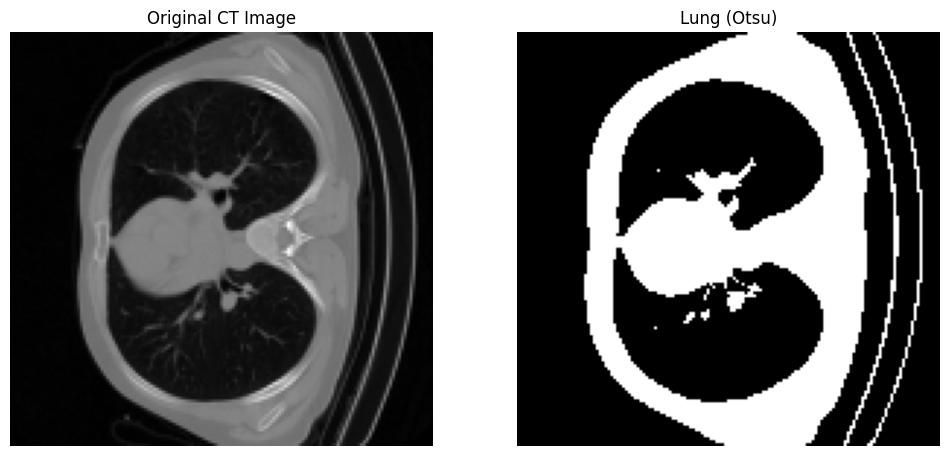

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the CT image (PNG format)
ct_image_path = '/content/download.png'  # Path to the PNG file
ct_image = cv2.imread(ct_image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply Otsu's thresholding
_, otsu_mask = cv2.threshold(ct_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Visualize the original CT image and the lung segmentation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original CT Image')
plt.imshow(ct_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Lung (Otsu)')
plt.imshow(otsu_mask, cmap='gray')
plt.axis('off')

# Save the lung segmentation as a new PNG file
output_path = '/content/lung_thresh.png'  # Path for the segmented mask
cv2.imwrite(output_path, otsu_mask)

plt.show()


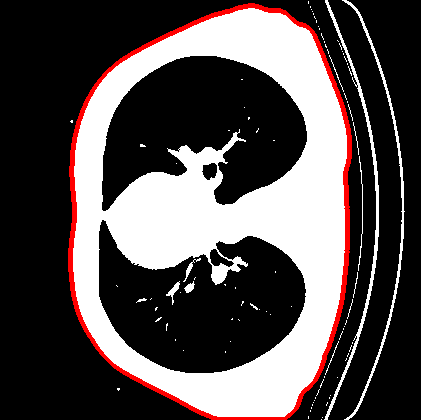

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
image_path = '/content/lung_thresh.png'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find contours
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour in yellow
output_image = image.copy()
cv2.drawContours(output_image, [largest_contour], -1, (0, 0, 255), 3)  # Yellow color (BGR: 0, 255, 255)

# Display the result
cv2_imshow(output_image)

# Optionally save the result
cv2.imwrite('output_with_largest_contour.jpg', output_image)

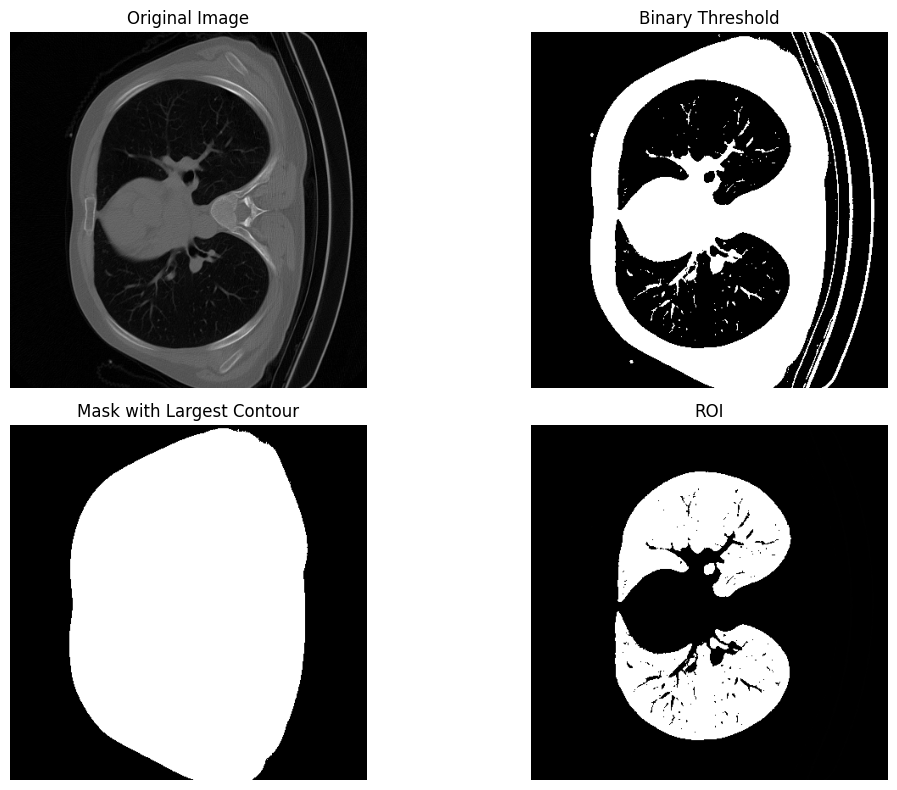

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/download.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply binary threshold
threshold_value = 30
_, binary_threshold = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Step 2: Detect the largest contour
contours, _ = cv2.findContours(binary_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv2.contourArea)

# Create a mask with the largest contour filled in white
mask = np.zeros_like(image)
cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Step 3: Detect the ROI by subtracting the threshold image from the mask
roi = mask - binary_threshold

# Visualize the results using Matplotlib
titles = ['Original Image', 'Binary Threshold', 'Mask with Largest Contour', 'ROI']
images = [image, binary_threshold, mask, roi]

plt.figure(figsize=(12, 8))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

##Segmentation using given mask

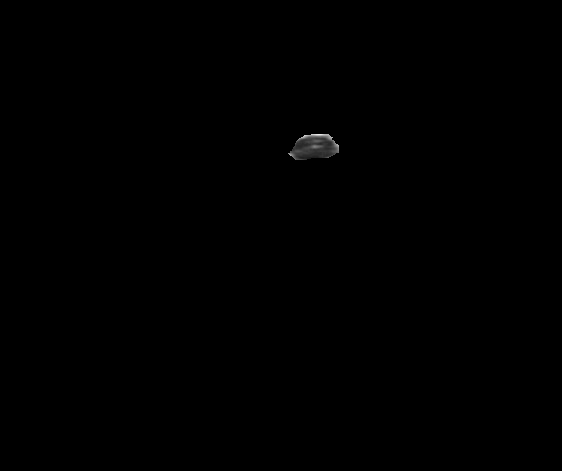

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load image and mask (ensure they have the same size)
image = cv2.imread('/content/benign (1).png')
mask1 = cv2.imread('/content/benign (1)_mask.png', cv2.IMREAD_GRAYSCALE)  # Mask should be grayscale

# Perform bitwise AND operation
result = cv2.bitwise_and(image,image, mask=mask1)

# Save or display the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()